# ResNet Network V2

In [1]:
# Code imports
import os, json, cv2, random
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [2]:
from detectron2.data.datasets import register_coco_instances

# First step - register the datasets

register_coco_instances("uodd_train", {}, "./Datasets/YOLO_UODD/annotations/coco/instances_train.json", "./Datasets/YOLO_UODD/images/train")
register_coco_instances("uodd_val", {}, "./Datasets/YOLO_UODD/annotations/coco/instances_val.json", "./Datasets/YOLO_UODD/images/val")


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



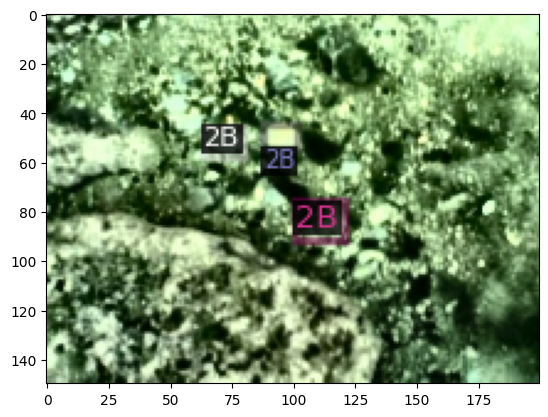

In [3]:
from matplotlib import pyplot as plt

# Check dataset format
dataset_dicts = DatasetCatalog.get("uodd_train")
dataset_metadata = MetadataCatalog.get("uodd_train")

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=dataset_metadata , scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])

In [4]:
from detectron2.model_zoo import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer


cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("uodd_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 800 
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes. (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/14 01:08:14 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (12, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (12,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, 

[06/14 01:08:14 d2.engine.train_loop]: Starting training from iteration 0


C:\Users\tommc\anaconda3\envs\AUT-DL\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/14 01:08:25 d2.utils.events]:  eta: 0:03:34  iter: 19  total_loss: 1.71  loss_cls: 1.244  loss_box_reg: 0.1074  loss_rpn_cls: 0.3137  loss_rpn_loc: 0.03095    time: 0.2800  last_time: 0.2443  data_time: 0.1700  last_data_time: 0.0011   lr: 6.1816e-06  max_mem: 2636M
[06/14 01:08:33 d2.utils.events]:  eta: 0:03:28  iter: 39  total_loss: 1.488  loss_cls: 1.045  loss_box_reg: 0.1517  loss_rpn_cls: 0.2993  loss_rpn_loc: 0.03533    time: 0.2830  last_time: 0.2515  data_time: 0.0009  last_data_time: 0.0013   lr: 1.2425e-05  max_mem: 2636M
[06/14 01:08:38 d2.utils.events]:  eta: 0:03:20  iter: 59  total_loss: 1.041  loss_cls: 0.6953  loss_box_reg: 0.1314  loss_rpn_cls: 0.2072  loss_rpn_loc: 0.02494    time: 0.2770  last_time: 0.2305  data_time: 0.0010  last_data_time: 0.0010   lr: 1.8669e-05  max_mem: 2636M
[06/14 01:08:43 d2.utils.events]:  eta: 0:03:08  iter: 79  total_loss: 0.6832  loss_cls: 0.4301  loss_box_reg: 0.1115  loss_rpn_cls: 0.1204  loss_rpn_loc: 0.02857    time: 0.2719  last

In [5]:
from detectron2.engine import DefaultPredictor

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[06/14 01:11:48 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output\model_final.pth ...


WARNING [06/14 01:11:49 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/14 01:11:49 d2.data.datasets.coco]: Loaded 128 images in COCO format from ./Datasets/YOLO_UODD/annotations/coco/instances_val.json


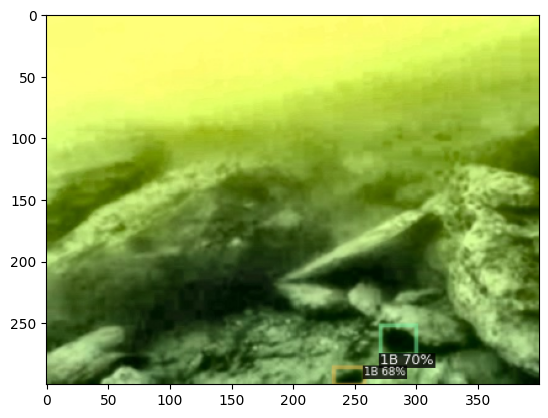

In [6]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = DatasetCatalog.get("uodd_val")
dataset_metadata = MetadataCatalog.get("uodd_val")

for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=dataset_metadata,
                   scale=1,
                   )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(out.get_image()[:, :, ::-1])

In [7]:
# MODEL EVAL

from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("uodd_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "uodd_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

WARNING [06/14 01:11:50 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/14 01:11:50 d2.data.datasets.coco]: Loaded 128 images in COCO format from ./Datasets/YOLO_UODD/annotations/coco/instances_val.json
[06/14 01:11:50 d2.data.build]: Distribution of instances among all 3 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|     0B     | 187          |     1B     | 556          |     2B     | 53           |
|            |              |            |              |            |              |
|   total    | 796          |            |              |            |              |
[06/14 01:11:50 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/14 01:11:50 d2.data.common]: Ser

In [8]:
# Validation of the dataset
register_coco_instances("uodd_tests", {}, "./Datasets/YOLO_UODD/annotations/coco/instances_test.json", "./Datasets/YOLO_UODD/images/test")


In [9]:
import json
# Initialize evaluator and data loader
evaluator = COCOEvaluator("uodd_tests", output_dir="./output_test")
val_loader = build_detection_test_loader(cfg, "uodd_tests")

# Perform inference and evaluation
results = inference_on_dataset(predictor.model, val_loader, evaluator)

# Print the overall results
print("Overall Results:", results)

# Extract category-wise metrics
with open("./output_test/coco_eval.json") as f:
    coco_eval = json.load(f)

# Function to print category metrics
def print_category_metrics(coco_eval):
    for category in coco_eval['precision']:
        category_id = category['category_id']
        category_name = category['category']
        ap_50 = category['ap_50']
        ap_50_95 = category['ap_50_95']
        ar = category['ar']

        print(f"Category: {category_name} (ID: {category_id})")
        print(f"  AP@50: {ap_50:.4f}")
        print(f"  AP@50-95: {ap_50_95:.4f}")
        print(f"  AR: {ar:.4f}")

# Print metrics for each category
print_category_metrics(coco_eval)

WARNING [06/14 01:12:01 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/14 01:12:01 d2.data.datasets.coco]: Loaded 506 images in COCO format from ./Datasets/YOLO_UODD/annotations/coco/instances_test.json
[06/14 01:12:01 d2.data.build]: Distribution of instances among all 3 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|     0B     | 739          |     1B     | 2216         |     2B     | 263          |
|            |              |            |              |            |              |
|   total    | 3218         |            |              |            |              |
[06/14 01:12:01 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/14 01:12:01 d2.data.common]: Se

FileNotFoundError: [Errno 2] No such file or directory: './output_test/coco_eval.json'